# Descriptive Analysis ##2

In [13]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [14]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [15]:
data_analysis = pd.read_csv('data_final.csv')

In [16]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,gdp_log,uhc_index,uhc_available_score,access_drinkwater_index,access_sani_index,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
1,1,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
2,2,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
3,3,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
4,4,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5490,5873,SDN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5491,5874,SDN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5492,5875,SDN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5493,5884,TUN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [19]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_dah_total_aid'].isnull().values.any())
print(data_analysis['best'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['uhc_index'].isnull().values.any())
print(data_analysis['uhc_available_score'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [20]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 60 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   5495 non-null   object 
 1   year_id                                                                                                               5495 non-null   int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  3887 non-null   float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  3887 non-null   float64
 4   daly_m

## dependent variable

In [21]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

count     3887.000000
mean     24134.118600
std      15553.926903
min        915.000000
25%      12950.000000
50%      20090.000000
75%      31394.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 5495 entries, 0 to 5494
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
3887 non-null   float64
dtypes: float64(1)
memory usage: 43.1 KB
None


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


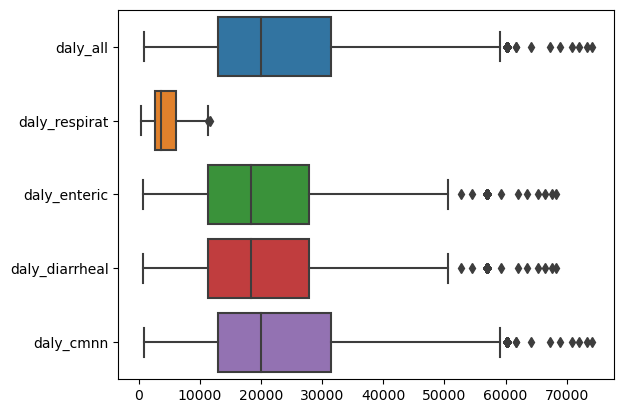

In [22]:
sns.boxplot(data=data_analysis[["daly_all", "daly_respirat",'daly_enteric','daly_diarrheal','daly_cmnn']], orient="h")
plt.savefig('daly_causes_boxplot.png')

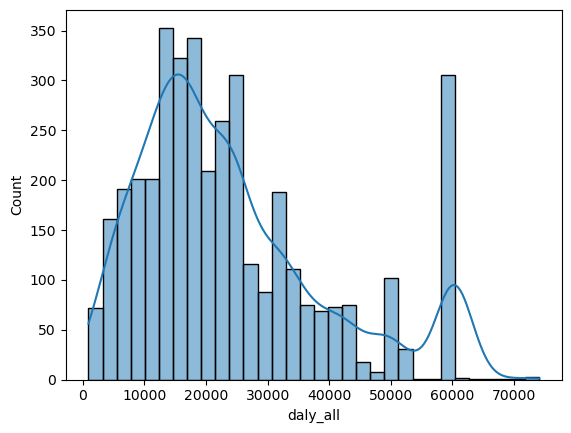

In [23]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [24]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

SkewtestResult(statistic=21.262376037321474, pvalue=2.5326383558368183e-100)

In [ ]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [25]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strangee since it sshould be complete, its estimates

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,daly_mean_All causes_No access to handwashing ...,29.262966
3,daly_mean_All causes_Unsafe sanitation_btsx_Al...,29.262966
4,daly_mean_All causes_Unsafe water source_btsx_...,29.262966
5,"daly_mean_Communicable, maternal, neonatal, an...",29.262966
6,"daly_mean_Communicable, maternal, neonatal, an...",29.262966
7,"daly_mean_Communicable, maternal, neonatal, an...",29.262966
8,daly_mean_Diarrheal diseases_No access to hand...,29.262966
9,daly_mean_Diarrheal diseases_Unsafe sanitation...,29.262966


In [ ]:
#what to do with missing data? balanced/ unbalanced panel?


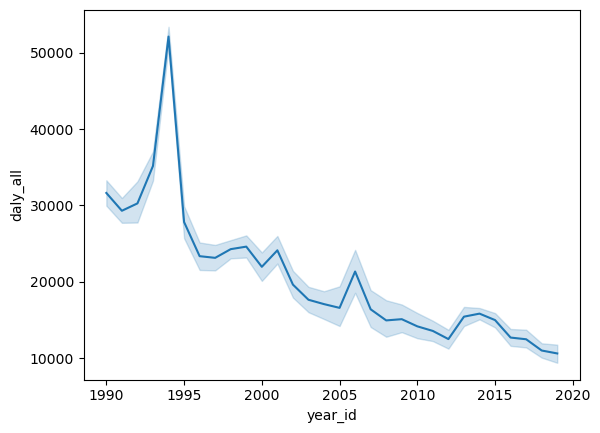

In [26]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.savefig('daly_all_timetrend.png')

In [ ]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

In [27]:
data_analysis['best'].describe()

count     4505.000000
mean       247.969145
std       1589.974207
min         25.000000
25%         32.000000
50%         50.000000
75%        100.000000
max      48183.000000
Name: best, dtype: float64

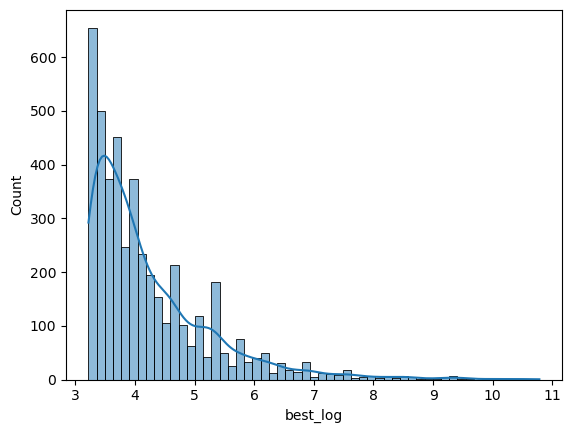

In [29]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

In [30]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    1608
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    1608
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                  1608


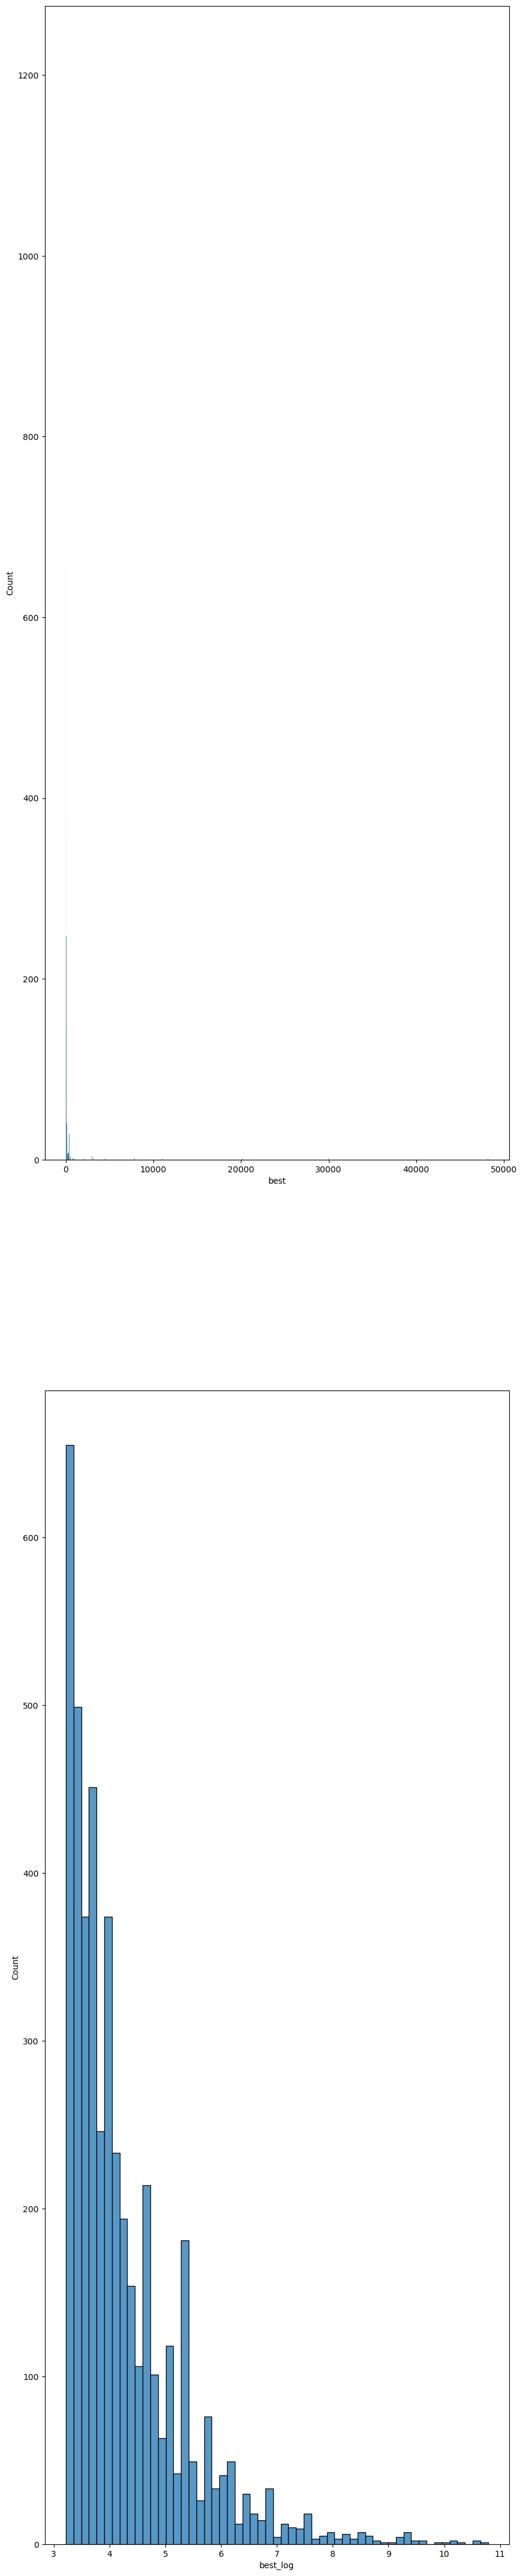

In [31]:
#compare logtransformed with non logtransfomed variables
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['best'],ax=axes[0])
sns.histplot(data_analysis['best_log'],ax=axes[1])

plt.savefig('conflict_log.png')

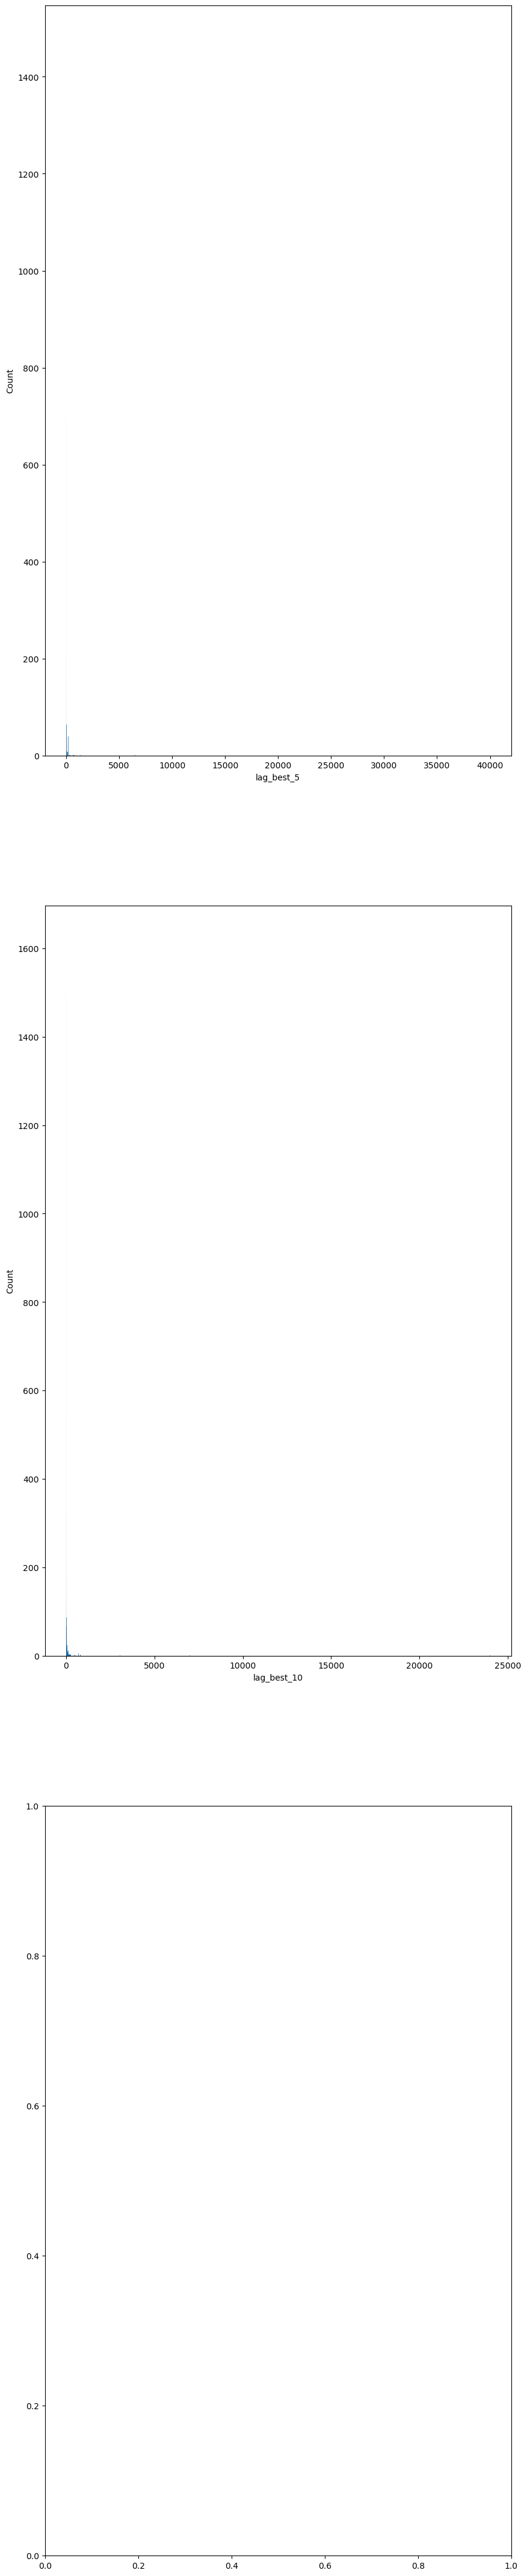

In [32]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

## controls package standard

In [36]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

count    3413.000000
mean        6.239100
std         1.106330
min         4.704661
25%         5.412223
50%         6.025768
75%         6.968580
max         9.895945
Name: gdp_log, dtype: float64
count    3750.000000
mean       45.502338
std         3.379716
min        27.461720
25%        43.690009
50%        45.772296
75%        48.078704
max        51.180881
Name: age0014_value, dtype: float64
count    1002.000000
mean       16.594285
std         8.508299
min         0.000184
25%        10.817475
50%        15.763373
75%        22.078286
max        52.181411
Name: xpd_gdp_value, dtype: float64


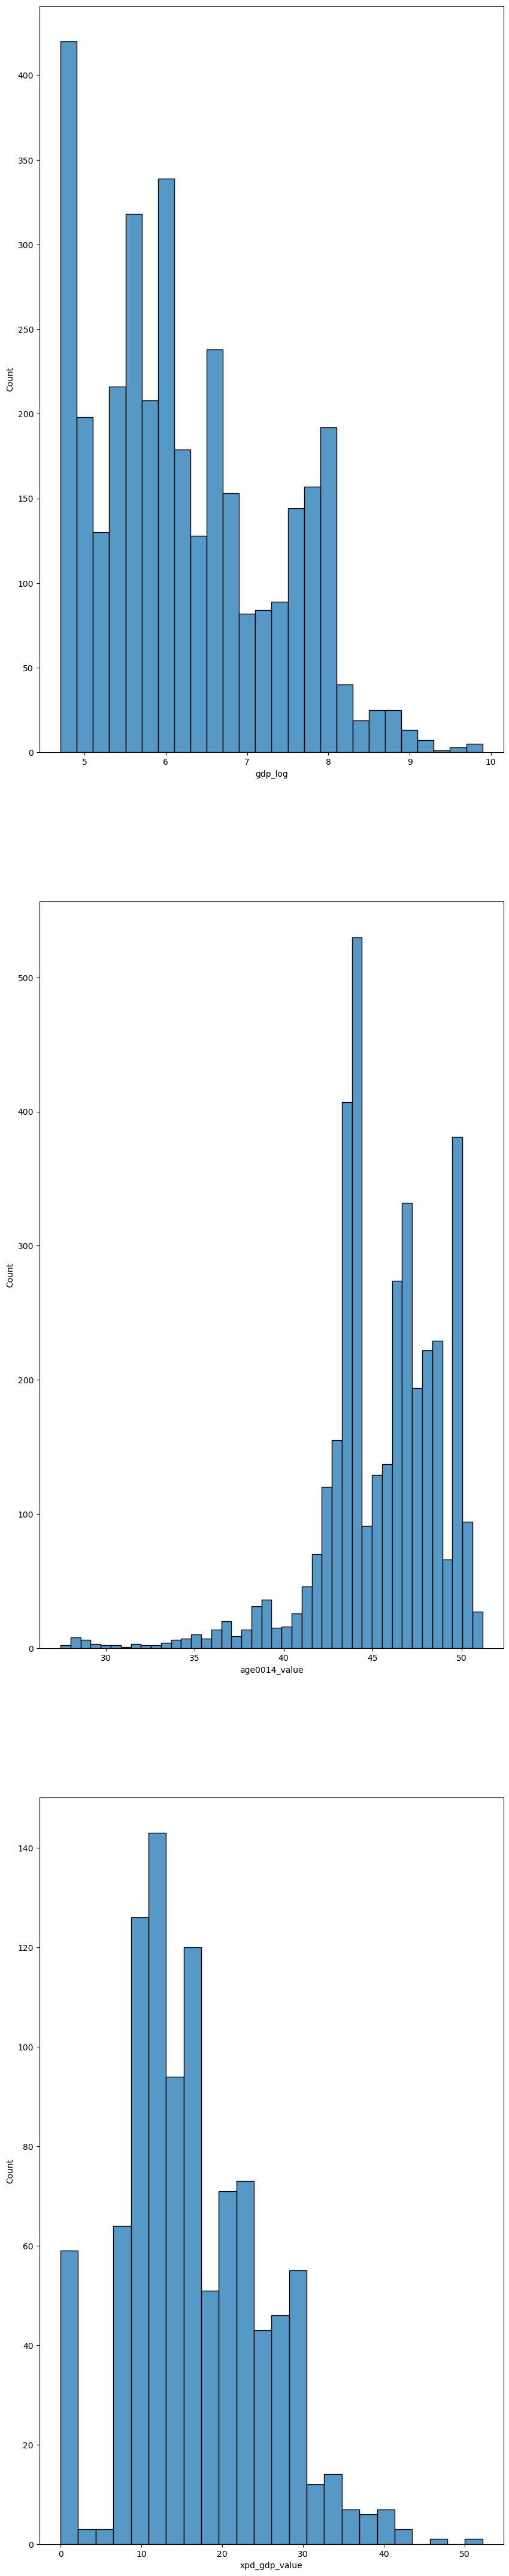

In [38]:
#produce distribution plots
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['gdp_log'],ax=axes[0])
sns.histplot(data_analysis['age0014_value'],ax=axes[1])
sns.histplot(data_analysis['xpd_gdp_value'],ax=axes[2])
plt.savefig('standard_control_hist.png')

#gdp has already been logtransformed

In [39]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    1608
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    1608
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    1608
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                  1608


## controls package health

In [40]:
#get descriptives
display(data_analysis['uhc_index'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

count    621.000000
mean      34.555878
std       10.958254
min       13.663830
25%       26.570570
50%       37.182590
75%       41.353990
max       69.405770
Name: uhc_index, dtype: float64

count    3645.000000
mean       10.699522
std         1.803243
min         4.564348
25%         9.286746
50%        10.529774
75%        11.746502
max        14.271484
Name: dah_total_log, dtype: float64

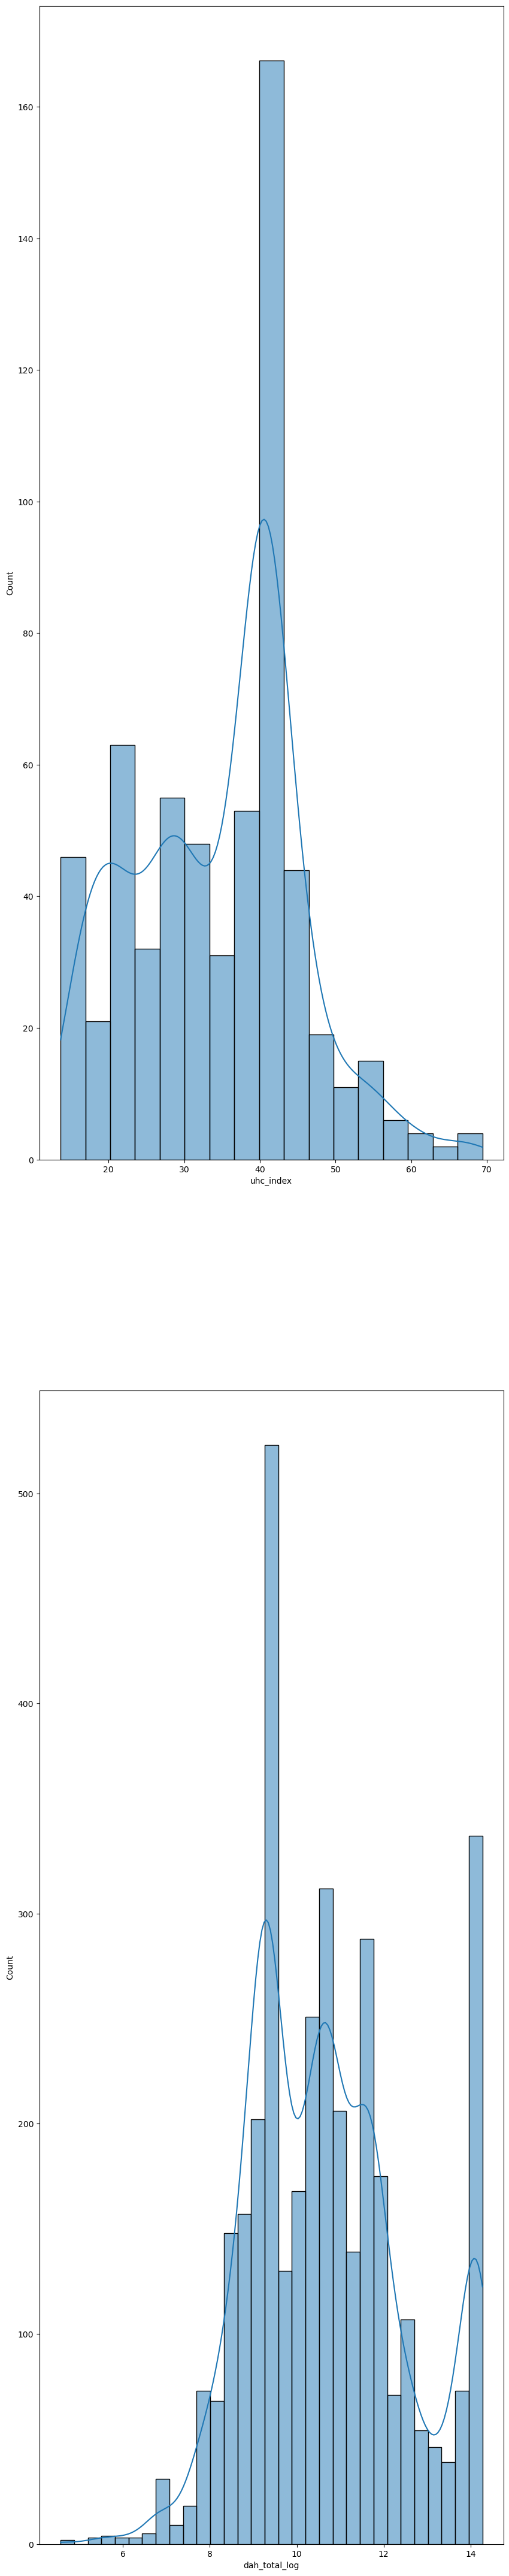

In [41]:
#produce distribution plots
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['uhc_index'],kde = True, ax=axes[0])
sns.histplot(data_analysis['dah_total_log'],kde = True, ax=axes[1])
plt.savefig('health_control_hist.png')
##dah has already been log transformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

## controls package disaster -- still to do, waiting for EM-DAT DATA

In [ ]:
#get descriptives
data_analysis['best'].describe()
data_analysis['best'].describe()
data_analysis['best'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

# Start the statistical analysis in python

In [5]:
import statsmodels

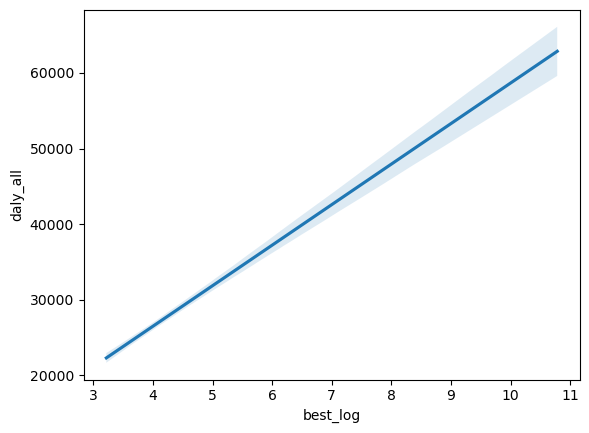

In [51]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

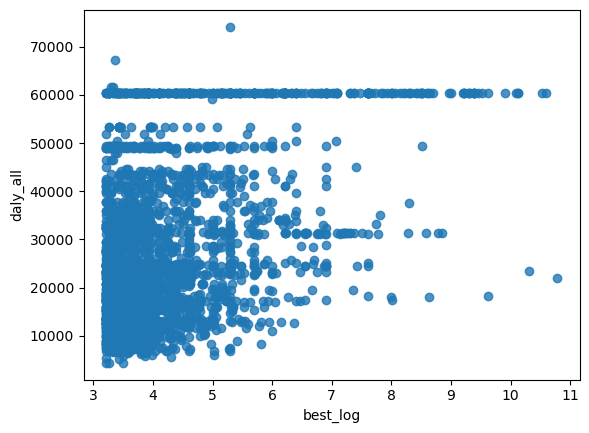

In [49]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

[Text(0.5, 1.0, 'Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')]

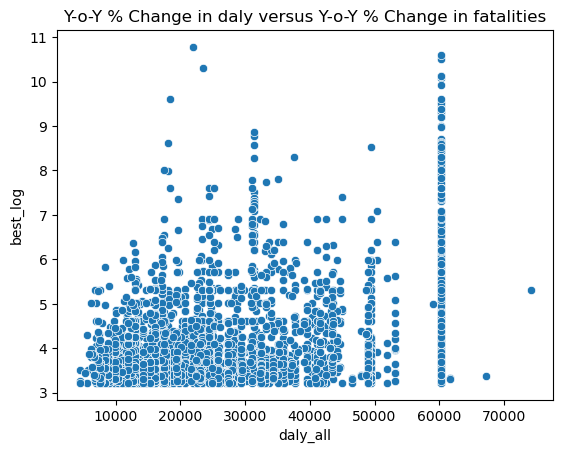

In [53]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [97]:
data = data_analysis.copy()

In [98]:
data.columns
data = data.filter(['iso', 'year_id','daly_all','best_log','best','dummy_conflict_lowtreshold',
                    'dummy_conflict_hightreshold','type_of_violence','intensity','gdp_log','dah_total_log',
                    'age0014_value','xpd_gdp_value','uhc_index',
                   'dummy_sb', 'dummy_ns', 'dummy_os', 'dummy_low_intensity', 'dummy_medium_intensity','dummy_high_intensity'])

In [99]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
mod = PanelOLS(data1.daly_all, data1.best_log, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0596
Estimator:                   PanelOLS   R-squared (Between):              0.4438
No. Observations:                2897   R-squared (Within):               0.0596
Date:                Tue, May 02 2023   R-squared (Overall):              0.3619
Time:                        15:59:12   Log-likelihood                -2.971e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      181.48
Entities:                          33   P-value                           0.0000
Avg Obs:                       87.788   Distribution:                  F(1,2863)
Min Obs:                       1.0000                                           
Max Obs:                       467.00   F-statistic (robust):             41.148
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [77]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
mod = PanelOLS(data2.daly_all, data2.best_log, entity_effects=True,time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0126
Estimator:                   PanelOLS   R-squared (Between):              0.1290
No. Observations:                2897   R-squared (Within):               0.0264
Date:                Tue, May 02 2023   R-squared (Overall):              0.1018
Time:                        15:39:27   Log-likelihood                -2.796e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      36.106
Entities:                          33   P-value                           0.0000
Avg Obs:                       87.788   Distribution:                  F(1,2834)
Min Obs:                       1.0000                                           
Max Obs:                       467.00   F-statistic (robust):             11.595
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [85]:
data.

Index(['iso', 'year_id', 'daly_all', 'best_log', 'best',
       'dummy_conflict_lowtreshold', 'dummy_conflict_hightreshold',
       'type_of_violence', 'intensity', 'gdp_log', 'dah_total_log',
       'age0014_value', 'uhc_index'],
      dtype='object')

In [80]:
#groupby and get the mean
#To run our fixed effect model, first, let’s get our mean data. 
#We can achieve this by grouping everything by individuals and taking the mean.
Y = "lwage"
T = "married"
X = [T, "expersq", "union", "hours"]

mean_data = data.groupby("nr")[X+[Y]].mean()
mean_data.head()

KeyError: 'index'

In [ ]:
#To demean the data, we need to set the index of the original data to be the individual identifier, nr.
#Then, we can simply subtract one data frame from the mean data frame.

demeaned_data = (data
               .set_index("nr") # set the index as the person indicator
               [X+[Y]]
               - mean_data) # subtract the mean data

demeaned_data.head()

In [ ]:
#run the fixed effects model
mod = smf.ols(f"{Y} ~ {'+'.join(X)}", data=demeaned_data).fit()
mod.summary().tables[1]

In [ ]:
### but the PANELOLS function from lienarmodels does exactly that already
'dummy_sb', 'dummy_ns', 'dummy_os',
       'intensity', 'dummy_low_intensity', 'dummy_medium_intensity',
       'dummy_high_intensity'

In [104]:
from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula('daly_all ~ best_log+dummy_medium_intensity',data=data.set_index(['iso','year_id']))

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


ValueError: exog does not have full column rank. If you wish to proceed with model estimation irrespective of the numerical accuracy of coefficient estimates, you can set check_rank=False.

In [105]:
### now I try my luck in R